In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle


file_list = []
class_list = []

DATADIR = "./dataset"

CATEGORIES = ['black_shoes','red_dress','black_shirt', 'white_dress', 'black_pants', 'blue_dress', 
              'red_shoes', 'blue_pants', 'white_shoes', 'blue_shirt', 'blue_shoes'] 

# The size of the images that your neural network will use
IMG_SIZE = 32

# Checking or all images in the data folder
for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), 1)

training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #read coloured image
            img_array = cv2.imread(os.path.join(path, img))
            image = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)).flatten()
            training_data.append([image, class_num])


create_training_data()

random.shuffle(training_data)


X = [] #features
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")

Epoch 1/40
218/218 [==============================] - 4s 17ms/step - loss: 1.8909 - accuracy: 0.3031 - val_loss: 0.7840 - val_accuracy: 0.6658
Epoch 2/40
218/218 [==============================] - 3s 15ms/step - loss: 0.7599 - accuracy: 0.7216 - val_loss: 0.4947 - val_accuracy: 0.8452
Epoch 3/40
218/218 [==============================] - 3s 14ms/step - loss: 0.5651 - accuracy: 0.8069 - val_loss: 0.4423 - val_accuracy: 0.8542
Epoch 4/40
218/218 [==============================] - 3s 13ms/step - loss: 0.4721 - accuracy: 0.8464 - val_loss: 0.3804 - val_accuracy: 0.8735
Epoch 5/40
218/218 [==============================] - 3s 14ms/step - loss: 0.3903 - accuracy: 0.8667 - val_loss: 0.4370 - val_accuracy: 0.8606
Epoch 6/40
218/218 [==============================] - 3s 14ms/step - loss: 0.3617 - accuracy: 0.8796 - val_loss: 0.3083 - val_accuracy: 0.8968
Epoch 7/40
218/218 [==============================] - 3s 14ms/step - loss: 0.3170 - accuracy: 0.8954 - val_loss: 0.3387 - val_accuracy: 0.8877

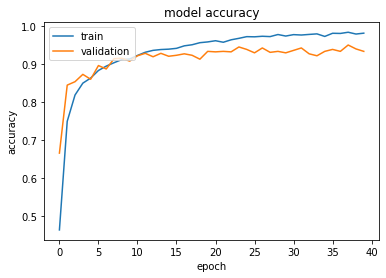

In [3]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

y = np.array(y)

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0


# Building the model
model = Sequential()

# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(11))
model.add(Activation("relu"))

# The output layer with 11 neurons for 11 classes
model.add(Dense(11))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')